# Lecture 01 - Gradient Descent Example

**Objective:** 
To learn how to use a dataset and perform a gradient descent loss on it.

## Look up the data set

The datast mtcars is built it, so we will use the help() function to look up the information available on it

In [1]:
help(mtcars)


mtcars                package:datasets                 R Documentation

_M_o_t_o_r _T_r_e_n_d _C_a_r _R_o_a_d _T_e_s_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     The data was extracted from the 1974 _Motor Trend_ US magazine,
     and comprises fuel consumption and 10 aspects of automobile design
     and performance for 32 automobiles (1973-74 models).

_U_s_a_g_e:

     mtcars
     
_F_o_r_m_a_t:

     A data frame with 32 observations on 11 (numeric) variables.

       [, 1]  mpg   Miles/(US) gallon                        
       [, 2]  cyl   Number of cylinders                      
       [, 3]  disp  Displacement (cu.in.)                    
       [, 4]  hp    Gross horsepower                         
       [, 5]  drat  Rear axle ratio                          
       [, 6]  wt    Weight (1000 lbs)                        
       [, 7]  qsec  1/4 mile time                            
       [, 8]  vs    Engine (0 = V-shaped, 1 = straight)      
       [, 9]  am    Transmission (0 = automatic, 1 = manual) 
       [,10]  gear  Number of forward gears                  
       [,11]  carb  Number of carburetors                    
      
_N_o_t_e:

     Henderson and Velleman (1981) comment in a footnote to Table 1:
     ‘Hocking [original transcriber]'s noncrucial coding of the Mazda's
     rotary engine as a straight six-cylinder engine and the Porsche's
     flat engine as a V engine, as well as the inclusion of the diesel
     Mercedes 240D, have been retained to enable direct comparisons to
     be made with previous analyses.’

_S_o_u_r_c_e:

     Henderson and Velleman (1981), Building multiple regression models
     interactively.  _Biometrics_, *37*, 391-411.

_E_x_a_m_p_l_e_s:

     require(graphics)
     pairs(mtcars, main = "mtcars data", gap = 1/4)
     coplot(mpg ~ disp | as.factor(cyl), data = mtcars,
            panel = panel.smooth, rows = 1)
     ## possibly more meaningful, e.g., for summary() or bivariate plots:
     mtcars2 <- within(mtcars, {
        vs <- factor(vs, labels = c("V", "S"))
        am <- factor(am, labels = c("automatic", "manual"))
        cyl  <- ordered(cyl)
        gear <- ordered(gear)
        carb <- ordered(carb)
     })
     summary(mtcars2)

### Load up the dataset

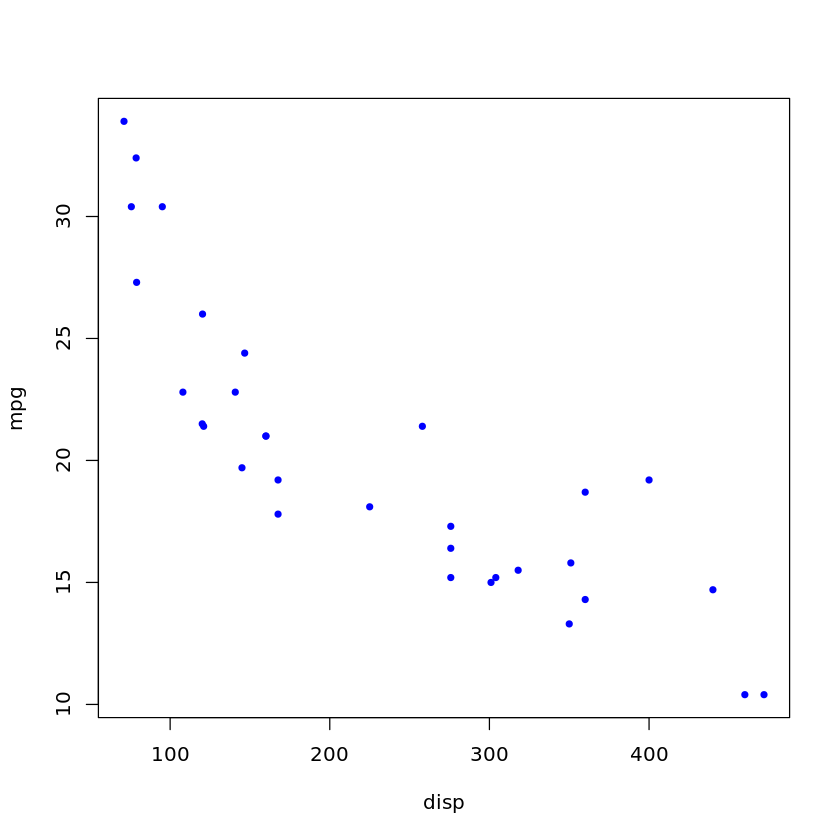

In [2]:
attach(mtcars)
plot(disp, mpg, col = "blue", pch = 20)

### Build a linear regression model on fuel consumption (mpg) and engine discplacement (disp)
And preent the coeffocients of ther egression model.

#### Linear regression is based on fitting a line to the data

$ y = m x + c$

where:
 - $y$ is the outcome
 - $m$ is the slope 
 - $x$ is the predictor
 - $c$ is the intercept 
 
 We use the ML() function to fit the line and coeff() to obtain the intercept and slope of the x = disp

In [10]:
model <- lm(mpg ~ disp, data = mtcars)
coef(model)

(Intercept)        disp 
29.59985476 -0.04121512

#### Now we plot the data and the fitted line 

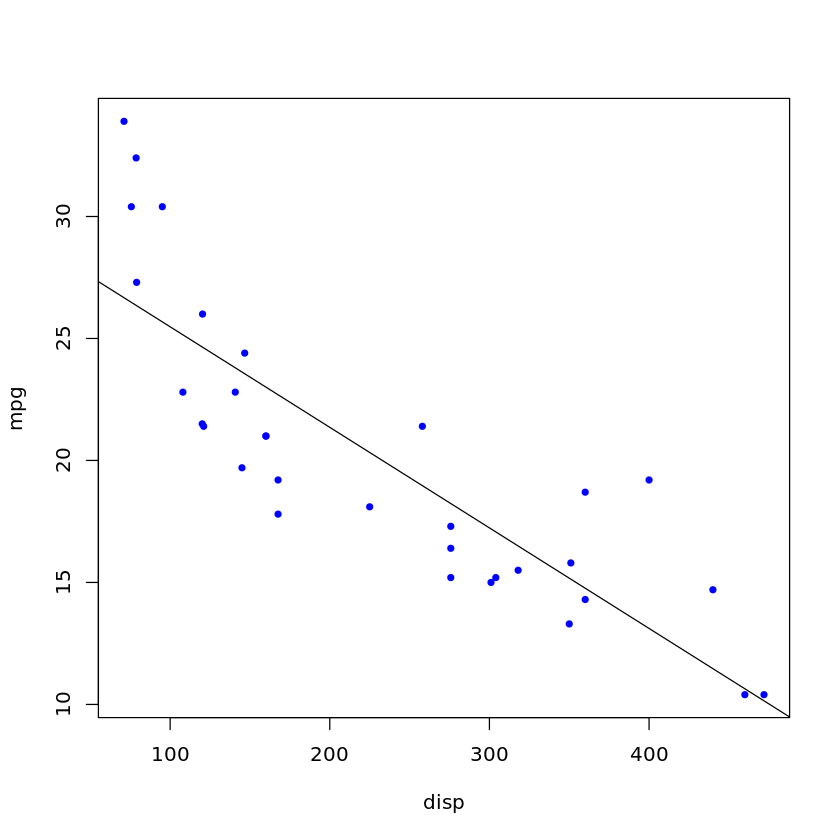

In [13]:
plot(disp, mpg, col = "blue", pch = 20)
abline(model)

## Calculate the error of prediction using the fitted line

### The error is based on Mean Squared Error
$ MSE = Σ(y_{actual} – y_{preds})^2 / n$

In [16]:
y_preds <- predict(model)
errors <- unname((mpg - y_preds) ^ 2)
err <- sum(errors) / length(mpg)
cat("MSE =",err)

MSE = 9.911209

## The Gradient Descent Algorithm

- is used to find the optimal intercept and gradient for data
- the algorithm below iterates over each set of xy data pairs and clculates new intercept and gradient values for new MSE 
- Then, the new MSE is subtracted from the old MSE and, if the difference is negligible, the optimal values are found

Details of this algorithm are found here:
https://www.r-bloggers.com/2017/02/implementing-the-gradient-descent-algorithm-in-r/

[1] "*Optimal intercept:* 29.5998514559518 Optimal slope: -0.0412151087838692"

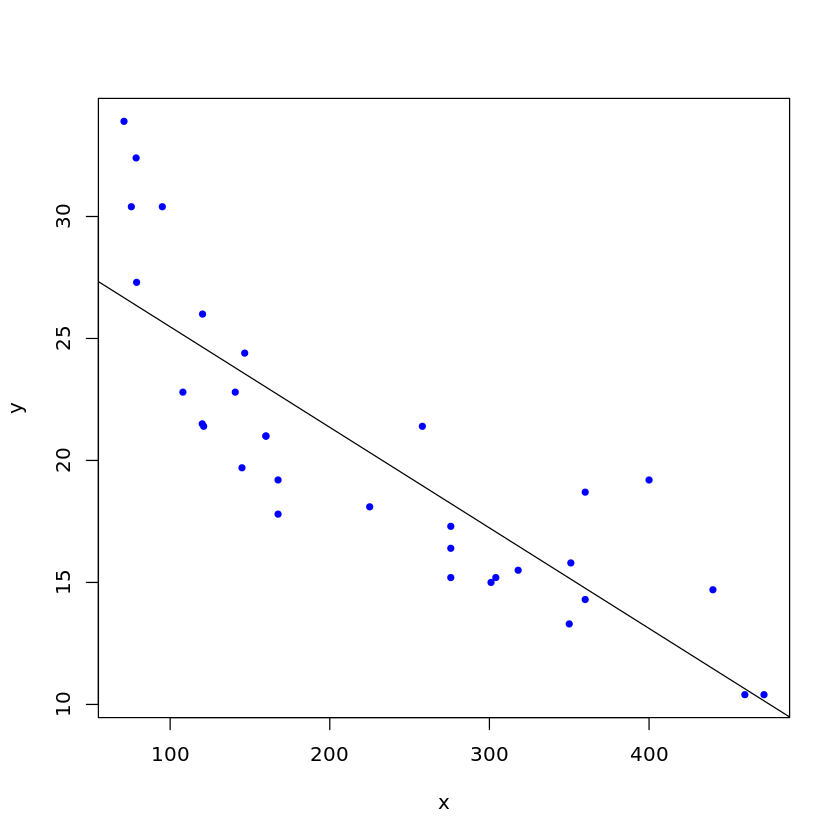

In [20]:
gradientDesc <- function(x, y, learn_rate, conv_threshold, n, max_iter) {
  plot(x, y, col = "blue", pch = 20)
  m <- runif(1, 0, 1)
  c <- runif(1, 0, 1)
  yhat <- m * x + c
  MSE <- sum((y - yhat) ^ 2) / n
  converged = F
  iterations = 0
  while(converged == F) {
    ## Implement the gradient descent algorithm
    m_new <- m - learn_rate * ((1 / n) * (sum((yhat - y) * x)))
    c_new <- c - learn_rate * ((1 / n) * (sum(yhat - y)))
    m <- m_new
    c <- c_new
    yhat <- m * x + c
    MSE_new <- sum((y - yhat) ^ 2) / n
    if(MSE - MSE_new <= conv_threshold) {
      abline(c, m) 
      converged = T
      return(paste("Optimal intercept:", c, "Optimal slope:", m))
    }
    iterations = iterations + 1
    if(iterations > max_iter) { 
      abline(c, m) 
      converged = T
      return(paste("Optimal intercept:", c, "Optimal slope:", m))
    }
  }
}

# Run the function 
gradientDesc(disp, mpg, 0.0000293, 0.001, 32, 2500000)

Compare the optimal results found to those calculated by fitting a linear regression above.